#1. Install necessary Packages

In [25]:
!pip install xgboost -q

# 2. Import required libraries

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
import warnings

# Suppress warnings for cleaner output
warnings.filterwarnings('ignore')

# 3. Load and Prepare Data

In [27]:
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['Species'] = iris.target
df['Species'] = df['Species'].map({0: iris.target_names[0], 1: iris.target_names[1], 2: iris.target_names[2]})


print("\nFirst 5 lines of DataSet: ")
print(df.head())
print("\nLast 5 lines of DataSet: ")
print(df.tail())


First 5 lines of DataSet: 
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  Species  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa  

Last 5 lines of DataSet: 
     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
145                6.7               3.0                5.2               2.3   
146                6.3               2.5                5.0               1.9   
147                6.5               3.0                5.2               2.0   
148                6.2               3.4                5.4               

# 4. Data Visualization

<Figure size 800x800 with 0 Axes>

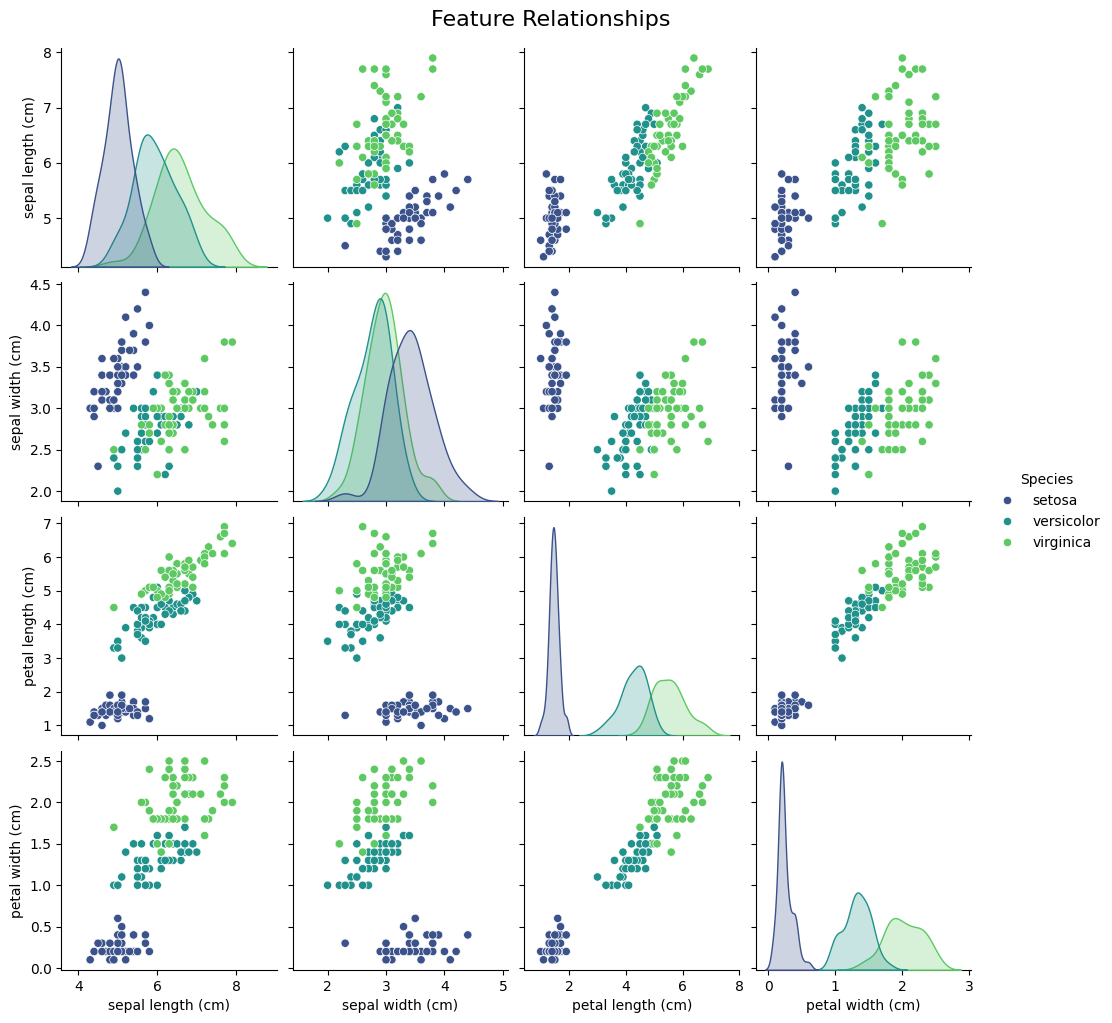

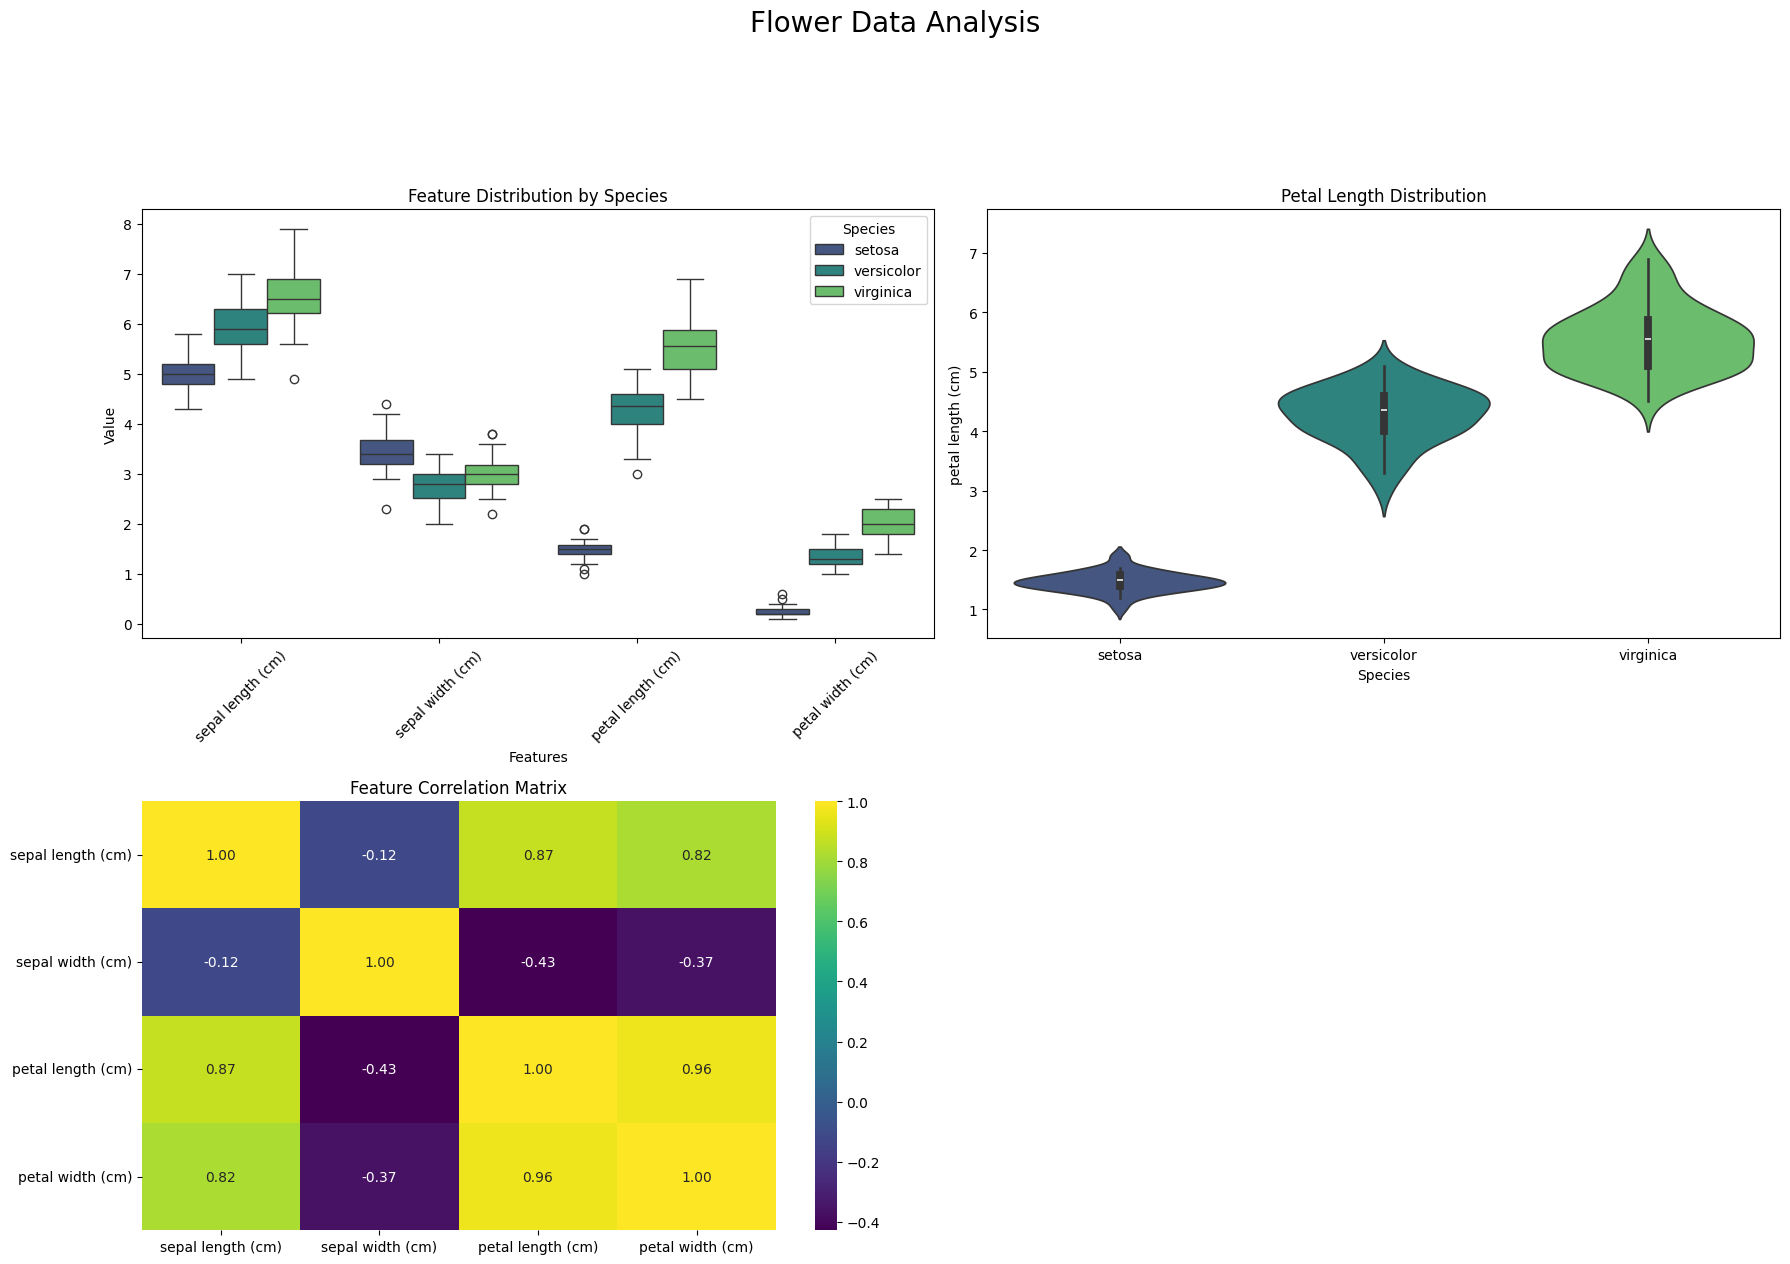

In [28]:
plt.figure(figsize=(8, 8))
sns.pairplot(df, hue='Species', palette='viridis')
plt.suptitle('Feature Relationships', y=1.02, fontsize=16)
plt.show()

plt.figure(figsize=(18, 12))
plt.suptitle("Flower Data Analysis", fontsize=20, y=1.05)

plt.subplot(2, 2, 1)
df_melted = pd.melt(df, id_vars='Species', var_name='Features', value_name='Value')
sns.boxplot(x='Features', y='Value', hue='Species', data=df_melted, palette='viridis')
plt.title('Feature Distribution by Species')
plt.xticks(rotation=45)

plt.subplot(2, 2, 2)
sns.violinplot(x='Species', y='petal length (cm)', data=df, palette='viridis')
plt.title('Petal Length Distribution')

plt.subplot(2, 2, 3)
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='viridis', fmt='.2f')
plt.title('Feature Correlation Matrix')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


# 5. Data Processing

In [29]:
X = df.drop('Species', axis=1)
y = df['Species']

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 6. Model Training & Evaluation

In [30]:
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'SVM': SVC(probability=True),
    'Random Forest': RandomForestClassifier(n_estimators=100),
    'XGBoost': XGBClassifier(n_estimators=100, eval_metric='mlogloss')
}

best_model = None
best_accuracy = 0

print("\n🚀 Training Models...\n")
for name, model in models.items():
    scores = cross_val_score(model, X_train_scaled, y_train, cv=5)
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)

    print(f"\n🔍 {name}:")
    print(f"Cross-Val Accuracy: {scores.mean():.4f} ± {scores.std():.4f}")
    print(f"Test Accuracy: {acc:.4f}")

    if acc > best_accuracy:
        best_accuracy = acc
        best_model = model

print(f"\n🏆 Best Model: {type(best_model).__name__} with accuracy {best_accuracy:.4f}")


🚀 Training Models...


🔍 Logistic Regression:
Cross-Val Accuracy: 0.9429 ± 0.0356
Test Accuracy: 1.0000

🔍 SVM:
Cross-Val Accuracy: 0.9429 ± 0.0356
Test Accuracy: 1.0000

🔍 Random Forest:
Cross-Val Accuracy: 0.9429 ± 0.0356
Test Accuracy: 1.0000

🔍 XGBoost:
Cross-Val Accuracy: 0.9143 ± 0.0555
Test Accuracy: 1.0000

🏆 Best Model: LogisticRegression with accuracy 1.0000


# 7. Prediction

In [31]:

from google.colab import output
from IPython.display import display, HTML

def predict_flower():
    print("\n🌸 Flower Species Predictor 🌸")
    print("Enter measurements in centimeters (e.g., 5.1, 3.5, 1.4, 0.2)\n")

    form = """
    <form id='flowerForm'>
        <label>Sepal Length (cm): </label><input type='number' step='any' id='sepal_length' required><br><br>
        <label>Sepal Width (cm): </label><input type='number' step='any' id='sepal_width' required><br><br>
        <label>Petal Length (cm): </label><input type='number' step='any' id='petal_length' required><br><br>
        <label>Petal Width (cm): </label><input type='number' step='any' id='petal_width' required><br><br>
        <button type='submit'>Predict</button>
    </form>
    <div id='result'></div>
    <script>
        document.getElementById('flowerForm').onsubmit = function(e) {
            e.preventDefault();
            const sl = document.getElementById('sepal_length').value;
            const sw = document.getElementById('sepal_width').value;
            const pl = document.getElementById('petal_length').value;
            const pw = document.getElementById('petal_width').value;
            google.colab.kernel.invokeFunction('notebook.predict', [sl, sw, pl, pw], {});
        };
    </script>
    """
    display(HTML(form))

def make_prediction(sepal_length, sepal_width, petal_length, petal_width):
    try:
        measurements = [float(sepal_length), float(sepal_width), float(petal_length), float(petal_width)]
        input_data = np.array([measurements])
        scaled_data = scaler.transform(input_data)
        prediction = best_model.predict(scaled_data)
        probabilities = best_model.predict_proba(scaled_data)[0]
        predicted_species = label_encoder.inverse_transform(prediction)[0]

        result = f"""
        <h3>📊 Prediction Results:</h3>
        <p><b>Predicted Species:</b> {predicted_species}</p>
        <p><b>Probability Breakdown:</b></p>
        <ul>
        """
        for species, prob in zip(label_encoder.classes_, probabilities):
            result += f"<li>{species}: {prob:.2%}</li>"
        result += "</ul>"
        display(HTML(result))
    except ValueError:
        display(HTML("<p style='color:red;'>Please enter valid numbers!</p>"))

output.register_callback('notebook.predict', make_prediction)

predict_flower()


🌸 Flower Species Predictor 🌸
Enter measurements in centimeters (e.g., 5.1, 3.5, 1.4, 0.2)

